In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ankulsharma150/netflix-data-analysis")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Paul\.cache\kagglehub\datasets\ankulsharma150\netflix-data-analysis\versions\1


In [2]:
import os
import pandas as pd
import numpy as np

In [3]:
files = os.listdir(path)
print("Files in dataset:")
for file in files:
    print(file)

Files in dataset:
netflix_movies (1).csv


In [4]:
file_path = os.path.join(path, "netflix_movies (1).csv")

df = pd.read_csv(file_path)
print(df.shape)
print(df.head())

(8807, 12)
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2

In [5]:
print(df.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [6]:
# Checking for missing values
print(df.isnull().sum())
print(df.dtypes)

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


In [7]:
# Exploring the data
print(df.describe())
print(df['type'].value_counts())

       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000
type
Movie      6131
TV Show    2676
Name: count, dtype: int64


In [8]:
print(df['rating'].value_counts())

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64


In [9]:
print(df['country'].value_counts().head(10))

country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64


In [10]:
print(df['listed_in'].value_counts().head(10))

listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            220
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: count, dtype: int64


In [11]:
print(df.groupby('type')['release_year'].describe())

          count         mean       std     min     25%     50%     75%     max
type                                                                          
Movie    6131.0  2013.121514  9.678169  1942.0  2012.0  2016.0  2018.0  2021.0
TV Show  2676.0  2016.605755  5.740138  1925.0  2016.0  2018.0  2020.0  2021.0


In [12]:
print(df['date_added'].value_counts().head(10))

date_added
January 1, 2020      109
November 1, 2019      89
March 1, 2018         75
December 31, 2019     74
October 1, 2018       71
October 1, 2019       60
July 1, 2021          60
November 1, 2018      60
September 1, 2021     56
July 1, 2019          52
Name: count, dtype: int64


In [13]:
# What are the longest and shortest titles
print("Longest titles")
print(df['title'].str.len().nlargest(5))
print("\nShortest titles")
print(df['title'].str.len().nsmallest(5))

Longest titles
5164    104
2813     93
3240     88
8462     88
4851     83
Name: title, dtype: int64

Shortest titles
2069    1
5958    1
7155    1
7687    1
2127    2
Name: title, dtype: int64


In [14]:
# See some short and long titles
df['title_length'] = df['title'].str.len()

print("Examples of long titles")
print(df.nlargest(5, 'title_length')[['title', 'title_length']])
print("\nExamples of short titles")
print(df.nsmallest(5, 'title_length')[['title', 'title_length']])

Examples of long titles
                                                  title  title_length
5164  Jim & Andy: The Great Beyond - Featuring a Ver...           104
2813  Ken Burns Presents: College Behind Bars: A Fil...            93
3240  Mike Birbiglia: What I Should Have Said Was No...            88
8462  The Power of Grayskull: The Definitive History...            88
4851  Steve Martin and Martin Short: An Evening You ...            83

Examples of short titles
     title  title_length
2069     H             1
5958     9             1
7155     K             1
7687     P             1
2127    3%             2


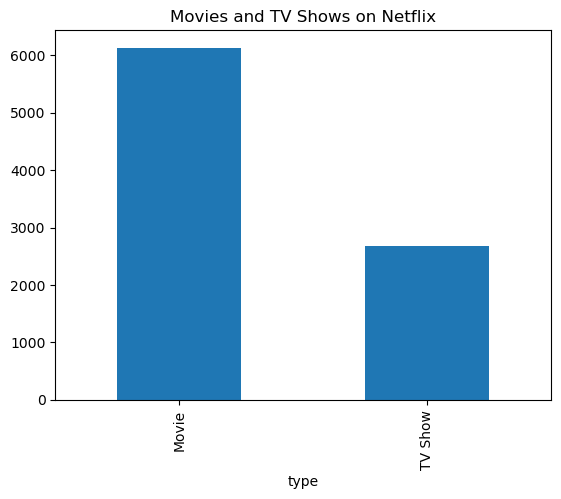

In [15]:
# Visualizing the data
import matplotlib.pyplot as plt

df['type'].value_counts().plot(kind='bar')
plt.title("Movies and TV Shows on Netflix")
plt.show()

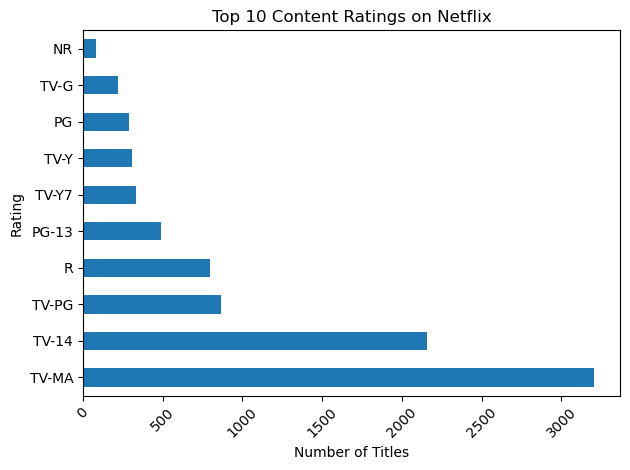

In [16]:
df['rating'].value_counts().head(10).plot(kind='barh')
plt.title("Top 10 Content Ratings on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

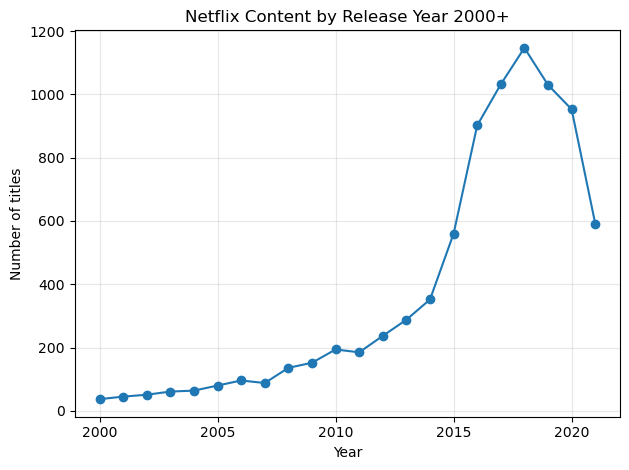

In [17]:
# Exploring time data
recent_content = df[df['release_year'] >= 2000]
recent_content['release_year'].value_counts().sort_index().plot(kind='line', marker = 'o')
plt.title("Netflix Content by Release Year 2000+")
plt.xlabel("Year")
plt.ylabel("Number of titles")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

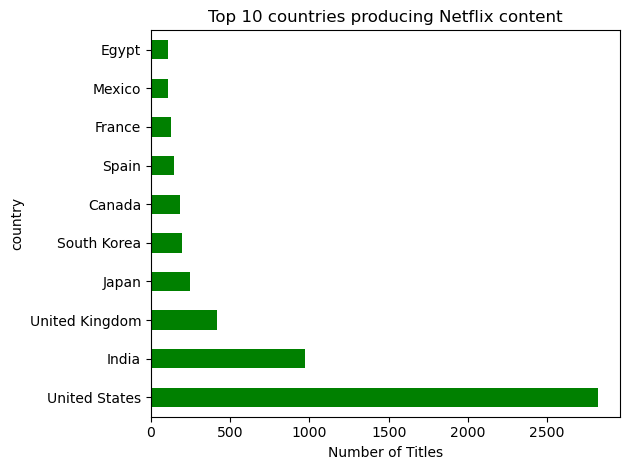

In [18]:
df['country'].value_counts().head(10).plot(kind='barh', color='green')
plt.title("Top 10 countries producing Netflix content")
plt.xlabel("Number of Titles")
plt.tight_layout()
plt.show()

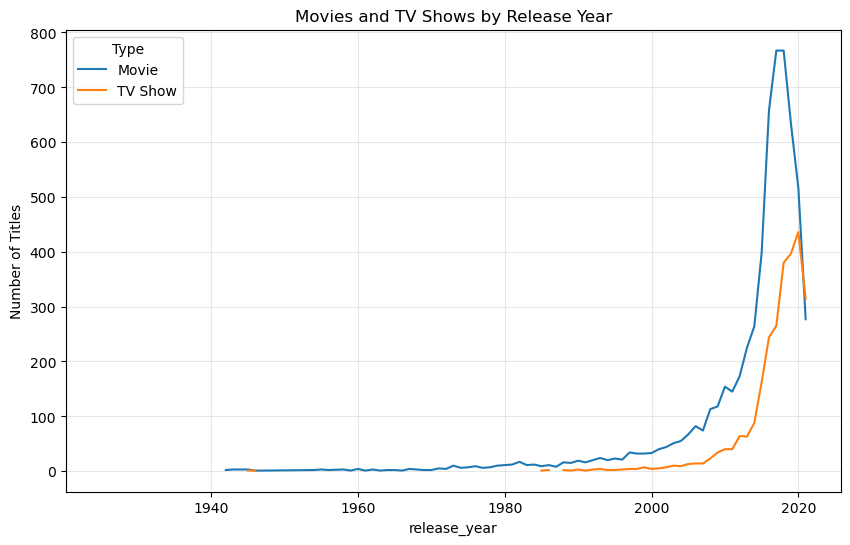

In [19]:
df.groupby(['release_year', 'type']).size().unstack().plot(kind='line', figsize=(10,6))
plt.title('Movies and TV Shows by Release Year')
plt.ylabel('Number of Titles')
plt.legend(title='Type')
plt.grid(True, alpha=0.3)
plt.show()

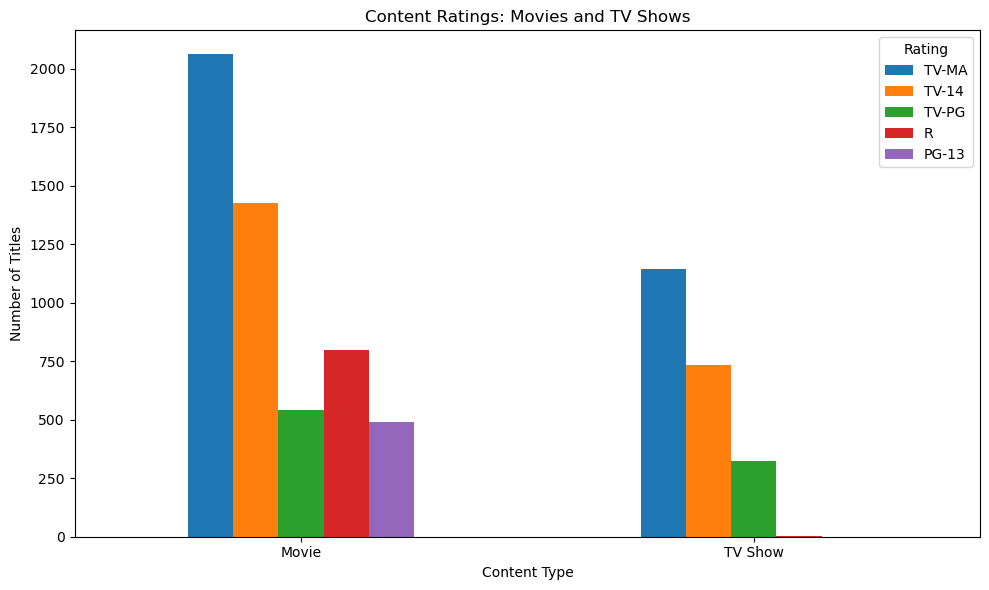

In [20]:
# Exploring multiple insights in one analysis
rating_by_type = pd.crosstab(df['type'], df['rating'])
rating_by_type[['TV-MA', 'TV-14', 'TV-PG', 'R', 'PG-13']].plot(kind='bar', figsize = (10, 6))
plt.title('Content Ratings: Movies and TV Shows')
plt.xlabel('Content Type')
plt.ylabel('Number of Titles')
plt.legend(title='Rating')
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

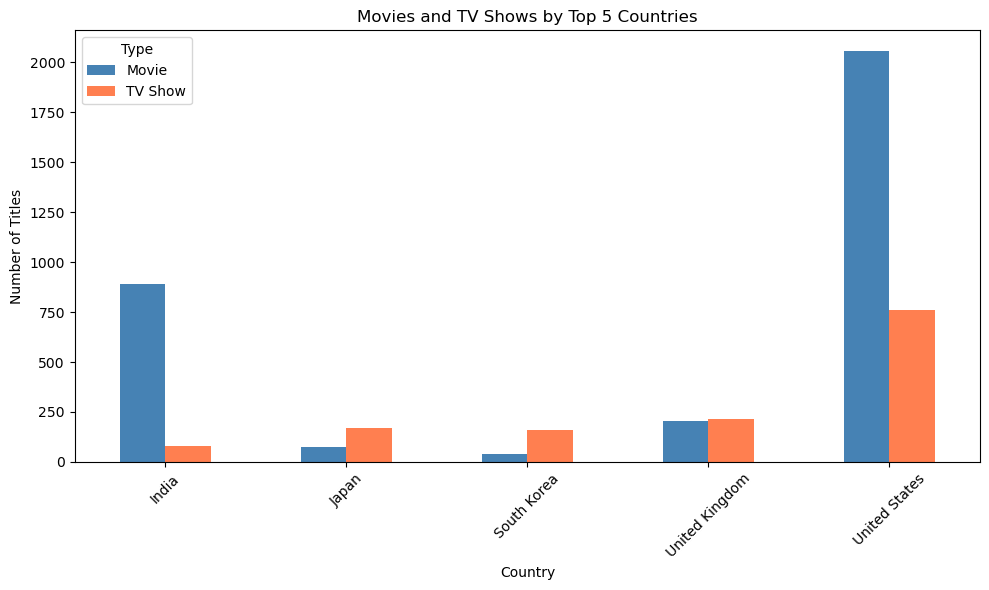

In [21]:
# What kind of content the top 5 producing countries make
top_countries = df['country'].value_counts().head(5).index
filtered_df = df[df['country'].isin(top_countries)]

country_type = pd.crosstab(filtered_df['country'], filtered_df['type'])
country_type.plot(kind='bar', figsize = (10, 6), color=['steelblue', 'coral'])
plt.title('Movies and TV Shows by Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.legend(title='Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

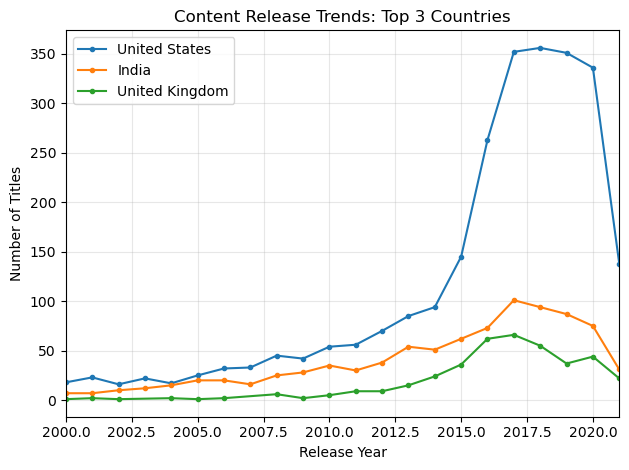

In [22]:
# See how content in the UK, India and the United States has evolved over time
top_3 = ['United States', 'India', 'United Kingdom']
for country in top_3:
    country_data = df[df['country'] == country]
    country_data['release_year'].value_counts().sort_index().plot(label=country, marker='.')

plt.title('Content Release Trends: Top 3 Countries')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(2000, 2021)
plt.tight_layout()
plt.show()

C:\Users\Paul\AppData\Local\Temp\ipykernel_3588\2227038575.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=45)


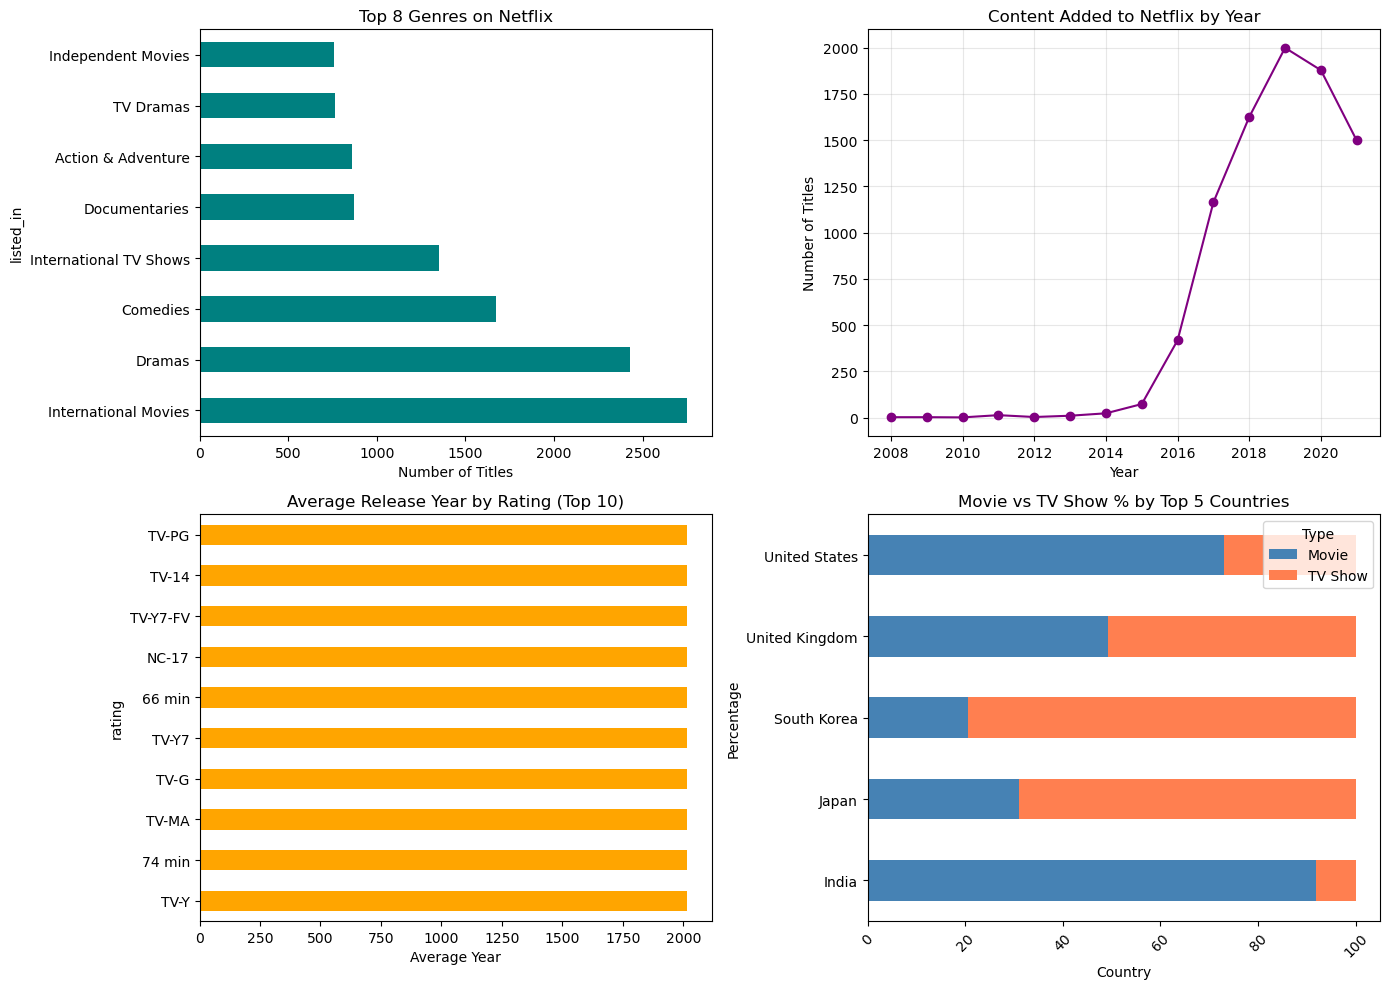

In [23]:
# How different genres have evolved over time
fig, axes = plt.subplots(2, 2, figsize = (14,10))

# Top genres overall
top_genres = df['listed_in'].str.split(', ').explode().value_counts().head(8)
top_genres.plot(kind = 'barh', ax = axes[0,0], color = 'teal')
axes[0,0].set_title('Top 8 Genres on Netflix')
axes[0,0].set_xlabel('Number of Titles')

# Content added by year
df['year_added'] = pd.to_datetime(df['date_added'], errors='coerce').dt.year
yearly_additions = df['year_added'].value_counts().sort_index()
yearly_additions.plot(kind = 'line', ax = axes[0,1], marker = 'o', color='purple')
axes[0,1].set_title('Content Added to Netflix by Year')
axes[0,1].set_xlabel('Year')
axes[0,1].set_ylabel('Number of Titles')
axes[0,1].grid(True, alpha=0.3)

# Average release year by rating
avg_year_by_rating = df.groupby('rating')['release_year'].mean().sort_values(ascending=False).head(10)
avg_year_by_rating.plot(kind = 'barh', ax = axes[1,0], color='orange')
axes[1,0].set_title('Average Release Year by Rating (Top 10)')
axes[1,0].set_xlabel('Average Year')

# Content type distribution by top 5 countries
top_5_countries = df['country'].value_counts().head(5).index
country_type_pct = df[df['country'].isin(top_5_countries)].groupby(['country', 'type']).size().unstack()
country_type_pct_normalized = country_type_pct.div(country_type_pct.sum(axis = 1), axis = 0)*100
country_type_pct_normalized.plot(kind='barh', stacked=True, ax = axes[1,1], color=['steelblue', 'coral'])
axes[1,1].set_title('Movie vs TV Show % by Top 5 Countries')
axes[1,1].set_xlabel('Country')
axes[1,1].set_ylabel('Percentage')
axes[1,1].legend(title='Type')
axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

C:\Users\Paul\AppData\Local\Temp\ipykernel_3588\2803408382.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


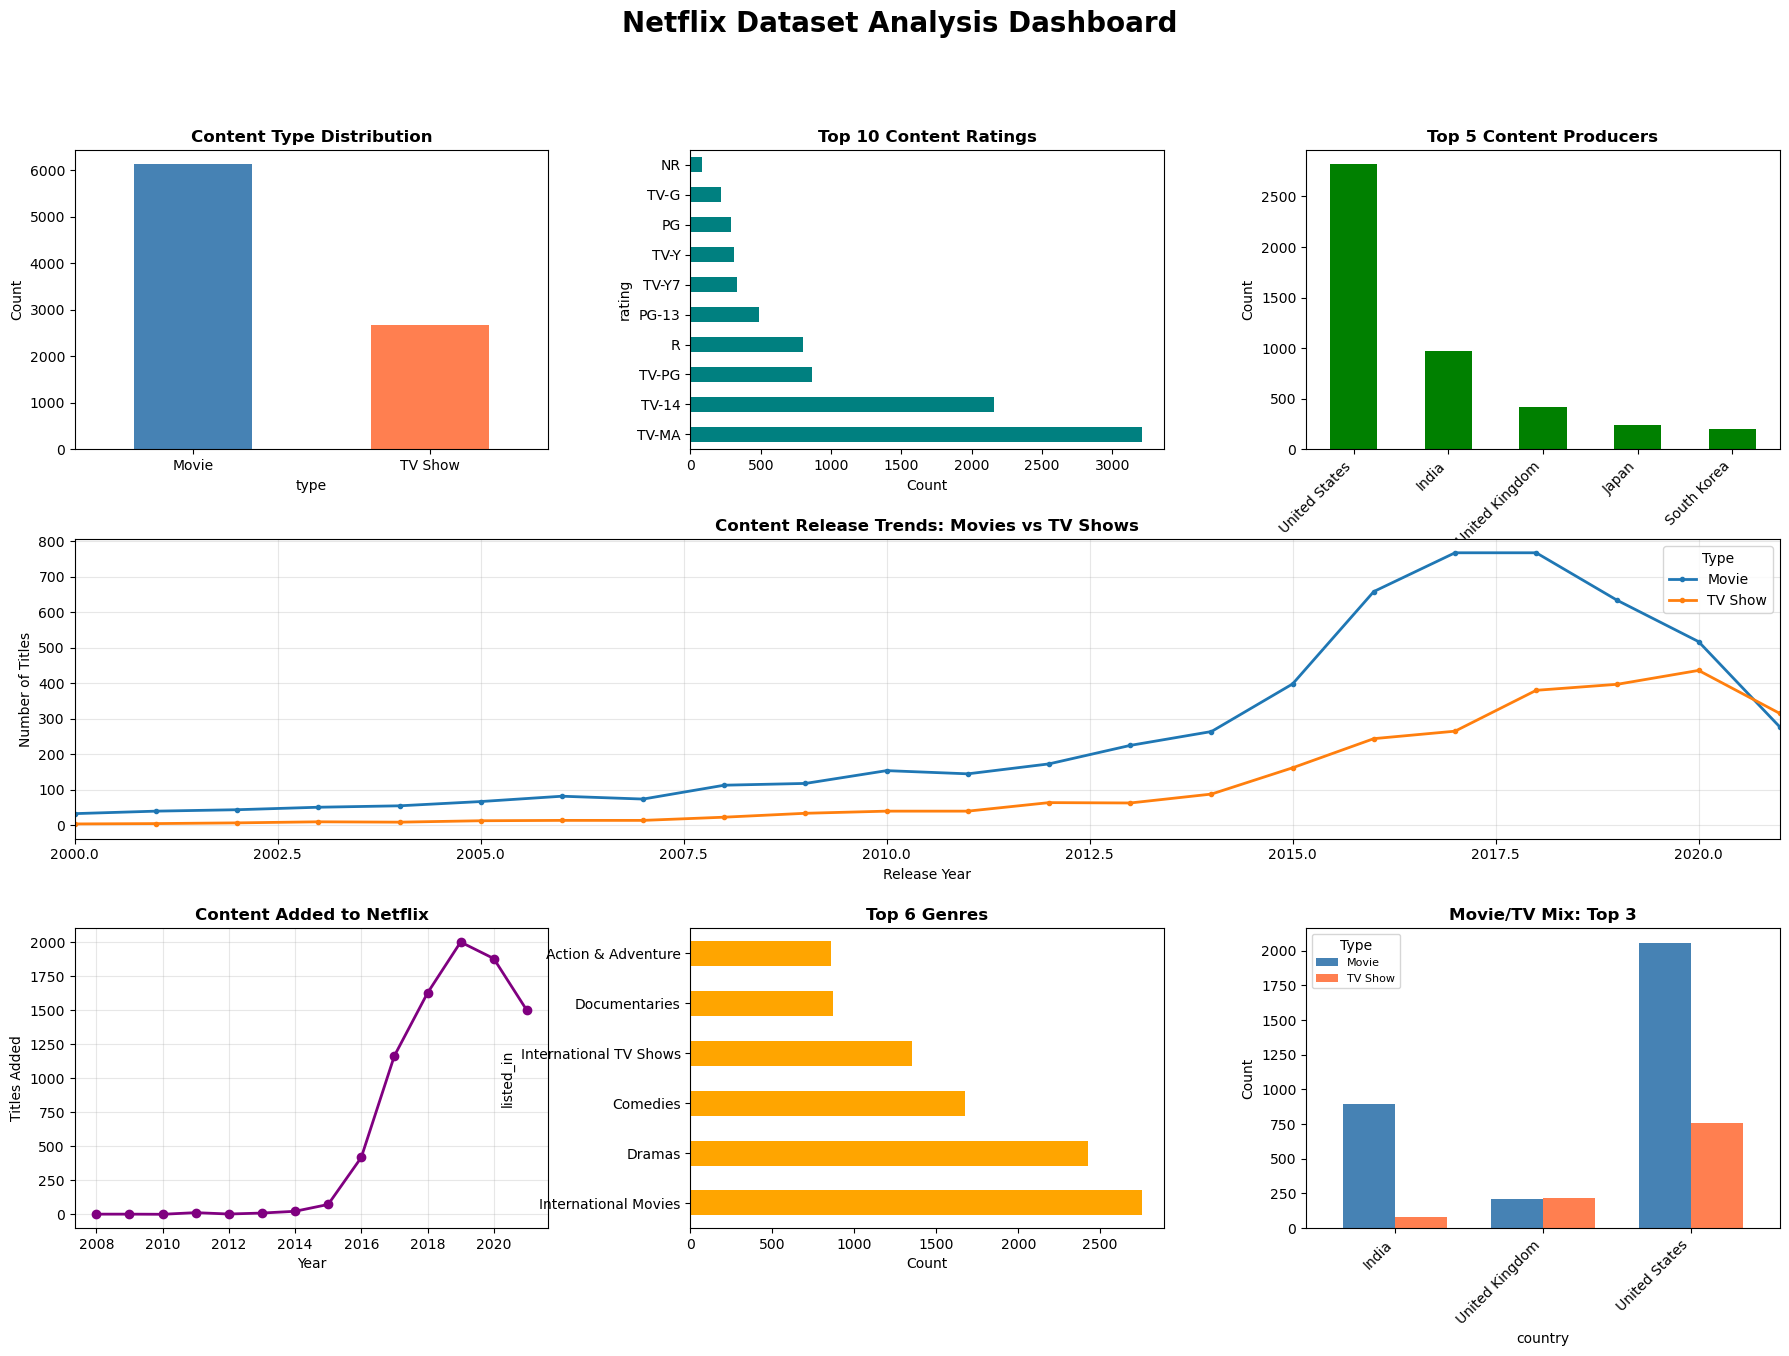


NETFLIX DATASET SUMMARY STATISTICS
Total Titles: 8,807
Movies: 6,131 (69.6%)
TV Shows: 2,676 (30.4%)

Release Year Range: 1925 - 2021
Average Release Year: 2014

Top Rating: TV-MA (3,207 titles)
Top Country: United States (2,818 titles)

Missing Data:
  - Director: 2,634 (29.9%)
  - Cast: 825 (9.4%)
  - Country: 831 (9.4%)


In [24]:
# Summary dashboard
# NETFLIX DATA ANALYSIS - SUMMARY DASHBOARD
fig = plt.figure(figsize=(22, 14))
fig.suptitle('Netflix Dataset Analysis Dashboard', fontsize=20, fontweight='bold', y=0.98)

# Create a grid layout
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. Movies vs TV Shows (large, top left)
ax1 = fig.add_subplot(gs[0, 0])
df['type'].value_counts().plot(kind='bar', ax=ax1, color=['steelblue', 'coral'])
ax1.set_title('Content Type Distribution', fontweight='bold')
ax1.set_ylabel('Count')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)

# 2. Top 10 Ratings (top middle)
ax2 = fig.add_subplot(gs[0, 1])
df['rating'].value_counts().head(10).plot(kind='barh', ax=ax2, color='teal')
ax2.set_title('Top 10 Content Ratings', fontweight='bold')
ax2.set_xlabel('Count')

# 3. Top 5 Countries (top right)
ax3 = fig.add_subplot(gs[0, 2])
df['country'].value_counts().head(5).plot(kind='bar', ax=ax3, color='green')
ax3.set_title('Top 5 Content Producers', fontweight='bold')
ax3.set_ylabel('Count')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right')

# 4. Release Year Trends (large, middle span)
ax4 = fig.add_subplot(gs[1, :])
df.groupby(['release_year', 'type']).size().unstack().plot(ax=ax4, linewidth=2, marker='.')
ax4.set_title('Content Release Trends: Movies vs TV Shows', fontweight='bold')
ax4.set_xlabel('Release Year')
ax4.set_ylabel('Number of Titles')
ax4.legend(title='Type')
ax4.grid(True, alpha=0.3)
ax4.set_xlim(2000, 2021)

# 5. Content Added Over Time (bottom left)
ax5 = fig.add_subplot(gs[2, 0])
yearly_additions.plot(kind='line', ax=ax5, marker='o', color='purple', linewidth=2)
ax5.set_title('Content Added to Netflix', fontweight='bold')
ax5.set_xlabel('Year')
ax5.set_ylabel('Titles Added')
ax5.grid(True, alpha=0.3)

# 6. Top Genres (bottom middle)
ax6 = fig.add_subplot(gs[2, 1])
top_genres_dash = df['listed_in'].str.split(', ').explode().value_counts().head(6)
top_genres_dash.plot(kind='barh', ax=ax6, color='orange')
ax6.set_title('Top 6 Genres', fontweight='bold')
ax6.set_xlabel('Count')

# 7. Country Content Mix (bottom right)
ax7 = fig.add_subplot(gs[2, 2])
top_3_countries = ['United States', 'India', 'United Kingdom']
country_mix = df[df['country'].isin(top_3_countries)].groupby(['country', 'type']).size().unstack()
country_mix.plot(kind='bar', ax=ax7, color=['steelblue', 'coral'], width=0.7)
ax7.set_title('Movie/TV Mix: Top 3', fontweight='bold')
ax7.set_ylabel('Count')
ax7.set_xticklabels(ax7.get_xticklabels(), rotation=45, ha='right')
ax7.legend(title='Type', fontsize=8)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("NETFLIX DATASET SUMMARY STATISTICS")
print("="*60)
print(f"Total Titles: {len(df):,}")
print(f"Movies: {len(df[df['type']=='Movie']):,} ({len(df[df['type']=='Movie'])/len(df)*100:.1f}%)")
print(f"TV Shows: {len(df[df['type']=='TV Show']):,} ({len(df[df['type']=='TV Show'])/len(df)*100:.1f}%)")
print(f"\nRelease Year Range: {df['release_year'].min()} - {df['release_year'].max()}")
print(f"Average Release Year: {df['release_year'].mean():.0f}")
print(f"\nTop Rating: {df['rating'].value_counts().index[0]} ({df['rating'].value_counts().values[0]:,} titles)")
print(f"Top Country: {df['country'].value_counts().index[0]} ({df['country'].value_counts().values[0]:,} titles)")
print(f"\nMissing Data:")
print(f"  - Director: {df['director'].isnull().sum():,} ({df['director'].isnull().sum()/len(df)*100:.1f}%)")
print(f"  - Cast: {df['cast'].isnull().sum():,} ({df['cast'].isnull().sum()/len(df)*100:.1f}%)")
print(f"  - Country: {df['country'].isnull().sum():,} ({df['country'].isnull().sum()/len(df)*100:.1f}%)")
print("="*60)

In [25]:
# Select relevant columns for hidden gems analysis
gems_df = df[['title', 'type', 'country', 'release_year', 'listed_in', 'date_added']].copy()

print("Selected columns shape:", gems_df.shape)
print("\nMissing values in our selection:")
print(gems_df.isnull().sum())
print("\nFirst few rows:")
print(gems_df.head())

Selected columns shape: (8807, 6)

Missing values in our selection:
title             0
type              0
country         831
release_year      0
listed_in         0
date_added       10
dtype: int64

First few rows:
                   title     type        country  release_year  \
0   Dick Johnson Is Dead    Movie  United States          2020   
1          Blood & Water  TV Show   South Africa          2021   
2              Ganglands  TV Show            NaN          2021   
3  Jailbirds New Orleans  TV Show            NaN          2021   
4           Kota Factory  TV Show          India          2021   

                                           listed_in          date_added  
0                                      Documentaries  September 25, 2021  
1    International TV Shows, TV Dramas, TV Mysteries  September 24, 2021  
2  Crime TV Shows, International TV Shows, TV Act...  September 24, 2021  
3                             Docuseries, Reality TV  September 24, 2021  
4  Interna

In [26]:
# Check what we're losing
print("Titles with missing country:")
print(gems_df[gems_df['country'].isnull()][['title', 'type', 'release_year']])

print(f"\nWe'll drop {gems_df['country'].isnull().sum()} rows and keep {len(gems_df) - gems_df['country'].isnull().sum()} rows")

# Drop rows with missing country
gems_df_clean = gems_df.dropna(subset=['country']).copy()

# Also drop the few rows with missing date_added (not critical but good practice)
gems_df_clean = gems_df_clean.dropna(subset=['date_added']).copy()

print(f"\nCleaned dataset shape: {gems_df_clean.shape}")
print(f"Remaining missing values:\n{gems_df_clean.isnull().sum()}")

Titles with missing country:
                                    title     type  release_year
2                               Ganglands  TV Show          2021
3                   Jailbirds New Orleans  TV Show          2021
5                           Midnight Mass  TV Show          2021
6        My Little Pony: A New Generation    Movie          2021
10    Vendetta: Truth, Lies and The Mafia  TV Show          2021
...                                   ...      ...           ...
8718               Westside vs. the World    Movie          2019
8759               World's Weirdest Homes    Movie          2015
8783                                 Yoko  TV Show          2016
8785                                  YOM  TV Show          2016
8803                          Zombie Dumb  TV Show          2018

[831 rows x 3 columns]

We'll drop 831 rows and keep 7976 rows

Cleaned dataset shape: (7967, 6)
Remaining missing values:
title           0
type            0
country         0
release_year 

In [27]:
# Filter for US content from before 2000
us_old = gems_df_clean[
    (gems_df_clean['country'].str.contains('United States', na=False)) & 
    (gems_df_clean['release_year'] < 2000)
].copy()

print(f"US content from before 2000: {len(us_old)} titles")
print(f"\nRelease year range: {us_old['release_year'].min()} - {us_old['release_year'].max()}")
print(f"\nContent types:\n{us_old['type'].value_counts()}")

# Filter for prestigious genres (Drama, Documentary, Classic, Independent)
prestigious_genres = ['Drama', 'Documentary', 'Classic', 'Independent', 'Cult']

us_old['genre_match'] = us_old['listed_in'].apply(
    lambda x: any(genre in x for genre in prestigious_genres)
)

us_gems = us_old[us_old['genre_match']].copy()

print(f"\nUS gems with prestigious genres: {len(us_gems)} titles")
print("\nSample of US hidden gems:")
print(us_gems[['title', 'release_year', 'listed_in']].head(10))

US content from before 2000: 303 titles

Release year range: 1942 - 1999

Content types:
type
Movie      271
TV Show     32
Name: count, dtype: int64

US gems with prestigious genres: 170 titles

Sample of US hidden gems:
                           title  release_year  \
7                        Sankofa          1993   
41                          Jaws          1975   
42                        Jaws 2          1978   
131  Blade Runner: The Final Cut          1982   
134     Clear and Present Danger          1994   
139           Do the Right Thing          1989   
144                  House Party          1990   
145                House Party 2          1991   
155                    Labyrinth          1986   
161                Mars Attacks!          1996   

                                             listed_in  
7     Dramas, Independent Movies, International Movies  
41          Action & Adventure, Classic Movies, Dramas  
42                    Dramas, Horror Movies, Thrillers  

In [28]:
# Rank US gems by "hidden gem score"
# Older = more hidden, certain genres = more prestigious
us_gems['age'] = 2021 - us_gems['release_year']  # How old is it?
us_gems['gem_score'] = us_gems['age']  # Older = higher score

# Bonus points for specific prestigious genres
us_gems['gem_score'] += us_gems['listed_in'].str.contains('Classic', na=False) * 10
us_gems['gem_score'] += us_gems['listed_in'].str.contains('Independent', na=False) * 5
us_gems['gem_score'] += us_gems['listed_in'].str.contains('Cult', na=False) * 5

# Get top 5
us_top5 = us_gems.nlargest(5, 'gem_score')[['title', 'release_year', 'listed_in', 'gem_score']]

print("="*70)
print("🎬 TOP 5 US HIDDEN GEMS (Pre-2000)")
print("="*70)
for idx, row in us_top5.iterrows():
    print(f"\n{row['title']} ({int(row['release_year'])})")
    print(f"   Genres: {row['listed_in']}")
    print(f"   Hidden Gem Score: {row['gem_score']:.0f}")
print("="*70)

🎬 TOP 5 US HIDDEN GEMS (Pre-2000)

Prelude to War (1942)
   Genres: Classic Movies, Documentaries
   Hidden Gem Score: 89

The Battle of Midway (1942)
   Genres: Classic Movies, Documentaries
   Hidden Gem Score: 89

Undercover: How to Operate Behind Enemy Lines (1943)
   Genres: Classic Movies, Documentaries
   Hidden Gem Score: 88

The Memphis Belle: A Story of a
Flying Fortress (1944)
   Genres: Classic Movies, Documentaries
   Hidden Gem Score: 87

The Negro Soldier (1944)
   Genres: Classic Movies, Documentaries
   Hidden Gem Score: 87


In [29]:
# Let's create a "balanced" top 5 - mix of historical value + entertainment
# Filter for movies from 1970-1995 (more accessible era)
us_accessible = us_gems[
    (us_gems['release_year'] >= 1970) & 
    (us_gems['release_year'] <= 1995)
].copy()

# Re-rank focusing on cult classics and dramas
us_accessible['entertainment_score'] = 2021 - us_accessible['release_year']
us_accessible['entertainment_score'] += us_accessible['listed_in'].str.contains('Cult', na=False) * 15
us_accessible['entertainment_score'] += us_accessible['listed_in'].str.contains('Classic', na=False) * 10
us_accessible['entertainment_score'] += us_accessible['listed_in'].str.contains('Action|Comedy', na=False) * 8

us_accessible_top5 = us_accessible.nlargest(5, 'entertainment_score')[['title', 'release_year', 'listed_in', 'entertainment_score']]

print("\n" + "="*70)
print("🍿 TOP 5 US HIDDEN GEMS (More Accessible Classics)")
print("="*70)
for idx, row in us_accessible_top5.iterrows():
    print(f"\n{row['title']} ({int(row['release_year'])})")
    print(f"   Genres: {row['listed_in']}")
print("="*70)

print("\n💡 Which set do you prefer for casual users?")
print("   A) Historical WWII documentaries (1942-1944)")
print("   B) Accessible cult classics (1970s-1990s)")
print("   C) Mix of both")


🍿 TOP 5 US HIDDEN GEMS (More Accessible Classics)

Logan's Run (1976)
   Genres: Action & Adventure, Classic Movies, Cult Movies

A Clockwork Orange (1971)
   Genres: Classic Movies, Cult Movies, Dramas

Mad Max (1979)
   Genres: Action & Adventure, Classic Movies, Cult Movies

Blade Runner: The Final Cut (1982)
   Genres: Action & Adventure, Classic Movies, Cult Movies

Streets of Fire (1984)
   Genres: Action & Adventure, Classic Movies, Cult Movies

💡 Which set do you prefer for casual users?
   A) Historical WWII documentaries (1942-1944)
   B) Accessible cult classics (1970s-1990s)
   C) Mix of both


In [30]:
# Get countries ranked by content volume
country_counts = gems_df_clean['country'].value_counts()

# Define "smaller producers" - countries with 50-200 titles (not too obscure, not mainstream)
# Exclude the big 5: US, India, UK, Japan, South Korea
big_producers = ['United States', 'India', 'United Kingdom', 'Japan', 'South Korea']

smaller_countries = country_counts[
    (country_counts >= 50) & 
    (country_counts <= 200)
].index.tolist()

# Remove big producers if they appear
smaller_countries = [c for c in smaller_countries if not any(big in c for big in big_producers)]

print("Smaller producer countries (50-200 titles):")
print(smaller_countries[:15])

# Filter for content from these countries
intl_gems = gems_df_clean[
    gems_df_clean['country'].apply(lambda x: any(country in x for country in smaller_countries))
].copy()

print(f"\n\nInternational content from smaller producers: {len(intl_gems)} titles")
print(f"\nContent types:\n{intl_gems['type'].value_counts()}")

# Filter for compelling genres (Drama, Thriller, International Movies/TV)
intl_gems['compelling'] = intl_gems['listed_in'].str.contains(
    'Drama|Thriller|International|Crime|Romantic', 
    na=False
)

intl_gems_filtered = intl_gems[intl_gems['compelling']].copy()

print(f"\nWith compelling genres: {len(intl_gems_filtered)} titles")
print("\nSample:")
print(intl_gems_filtered[['title', 'country', 'release_year', 'listed_in']].head(10))

Smaller producer countries (50-200 titles):
['Canada', 'Spain', 'France', 'Mexico', 'Egypt', 'Turkey', 'Nigeria', 'Australia', 'Taiwan', 'Indonesia', 'Brazil', 'Philippines', 'Germany', 'China', 'Thailand']


International content from smaller producers: 2449 titles

Content types:
type
Movie      1791
TV Show     658
Name: count, dtype: int64

With compelling genres: 1936 titles

Sample:
                     title                                            country  \
7                  Sankofa  United States, Ghana, Burkina Faso, United Kin...   
12            Je Suis Karl                            Germany, Czech Republic   
17         Falsa identidad                                             Mexico   
21  Resurrection: Ertugrul                                             Turkey   
25    Love on the Spectrum                                          Australia   
29                Paranoia                       United States, India, France   
38     Birth of the Dragon               

In [ ]:
# Create a discovery score for international gems
# Factors: compelling genres, diverse countries, variety in release years

# Extract primary country (first country listed)
intl_gems_filtered['primary_country'] = intl_gems_filtered['country'].str.split(',').str[0]

# Score based on:
# 1. Country diversity (favor less common countries on this list)
# 2. Genre appeal
# 3. Recency (not too old, not too new - sweet spot 2015-2020)

intl_gems_filtered['discovery_score'] = 0

# Bonus for specific compelling genres
intl_gems_filtered['discovery_score'] += intl_gems_filtered['listed_in'].str.contains('Crime', na=False) * 10
intl_gems_filtered['discovery_score'] += intl_gems_filtered['listed_in'].str.contains('Thriller', na=False) * 10
intl_gems_filtered['discovery_score'] += intl_gems_filtered['listed_in'].str.contains('Romantic', na=False) * 8

# Bonus for "sweet spot" years (2015-2020) - modern enough but potentially overlooked
intl_gems_filtered['in_sweet_spot'] = (
    (intl_gems_filtered['release_year'] >= 2015) & 
    (intl_gems_filtered['release_year'] <= 2020)
).astype(int) * 15

intl_gems_filtered['discovery_score'] += intl_gems_filtered['in_sweet_spot']

# Bonus for underrepresented countries (Nigeria, Turkey, Egypt, Taiwan, Thailand)
underrep_countries = ['Nigeria', 'Turkey', 'Egypt', 'Taiwan', 'Thailand', 'Indonesia', 'Philippines']
intl_gems_filtered['discovery_score'] += intl_gems_filtered['primary_country'].apply(
    lambda x: 12 if x in underrep_countries else 0
)

# Get diverse top 5 (ensure variety in countries)
intl_top5_candidates = intl_gems_filtered.nlargest(20, 'discovery_score')

# Select top 5 ensuring country diversity
selected = []
used_countries = set()

for idx, row in intl_top5_candidates.iterrows():
    if row['primary_country'] not in used_countries and len(selected) < 5:
        selected.append(row)
        used_countries.add(row['primary_country'])

intl_top5 = pd.DataFrame(selected)

print("="*70)
print("🌍 TOP 5 INTERNATIONAL HIDDEN GEMS")
print("="*70)
for idx, row in intl_top5.iterrows():
    print(f"\n{row['title']} ({int(row['release_year'])}) - {row['primary_country']}")
    print(f"   Type: {row['type']}")
    print(f"   Genres: {row['listed_in']}")
    print(f"   Discovery Score: {row['discovery_score']:.0f}")
print("="*70)